### Plotting all CCBOR biweekly water sampling data with quarterly data from John Stolz's group

#### Overlaid sites (see other notebook for separated site plots)

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import kde
from matplotlib import cm
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [2]:
# read from csv 
biweek = pd.read_csv("/home/millieginty/Documents/git-repos/ccbor/data/biweekly/ccbor-biweekly-stolz.csv", parse_dates=['date'])

biweek.head()

,site,date,latitude,longitude,epsg3857_x,epsg3857_y,Sampling time,Watershed,Location,Samplers,...,W(mg/L),Pb(mg/L),Bi(mg/L),U(mg/L),Methane,Ethane,Ethene,Propane,Propylene,Butane
0,1,2021-08-13,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, KM, SB, JP",...,bdl,0.0002,bdl,0.0025,16.0,bdl,bdl,bdl,NaN,NaN
1,1,2021-09-03,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, SB",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2021-09-17,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"BL, KM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2021-10-01,40.464786,-82.854767,-9.223350e+06,4.933715e+06,10:51:00 AM,West Branch Alum Creek,Upstream,"CH, KM, BK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2021-10-15,40.464786,-82.854767,-9.223350e+06,4.933715e+06,10:42:00 AM,West Branch Alum Creek,Upstream,"CH, KM, CO",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
## Split the dataframe into site-specific dataframes

biweek1 = biweek[biweek['site'] == 1] # West Branch Alum Creek, upstream
biweek2 = biweek[biweek['site'] == 2] # West Branch Alum Creek, downstream 1
biweek3 = biweek[biweek['site'] == 3] # West Branch Alum Creek, downstream 2
biweek4 = biweek[biweek['site'] == 4] # Headwaters Alum Creek, upstream
biweek5 = biweek[biweek['site'] == 5] # Headwaters Alum Creek, downstream
biweek6 = biweek[biweek['site'] == 6] # Headwaters Alum Creek, intermediate 2
biweek7 = biweek[biweek['site'] == 7] # Headwaters Alum Creek, intermediate 1
biweek8 = biweek[biweek['site'] == 8] # Headwaters Big Walnut Creek, downstream
biweek9 = biweek[biweek['site'] == 9] # Little Walnut Creek, downstream

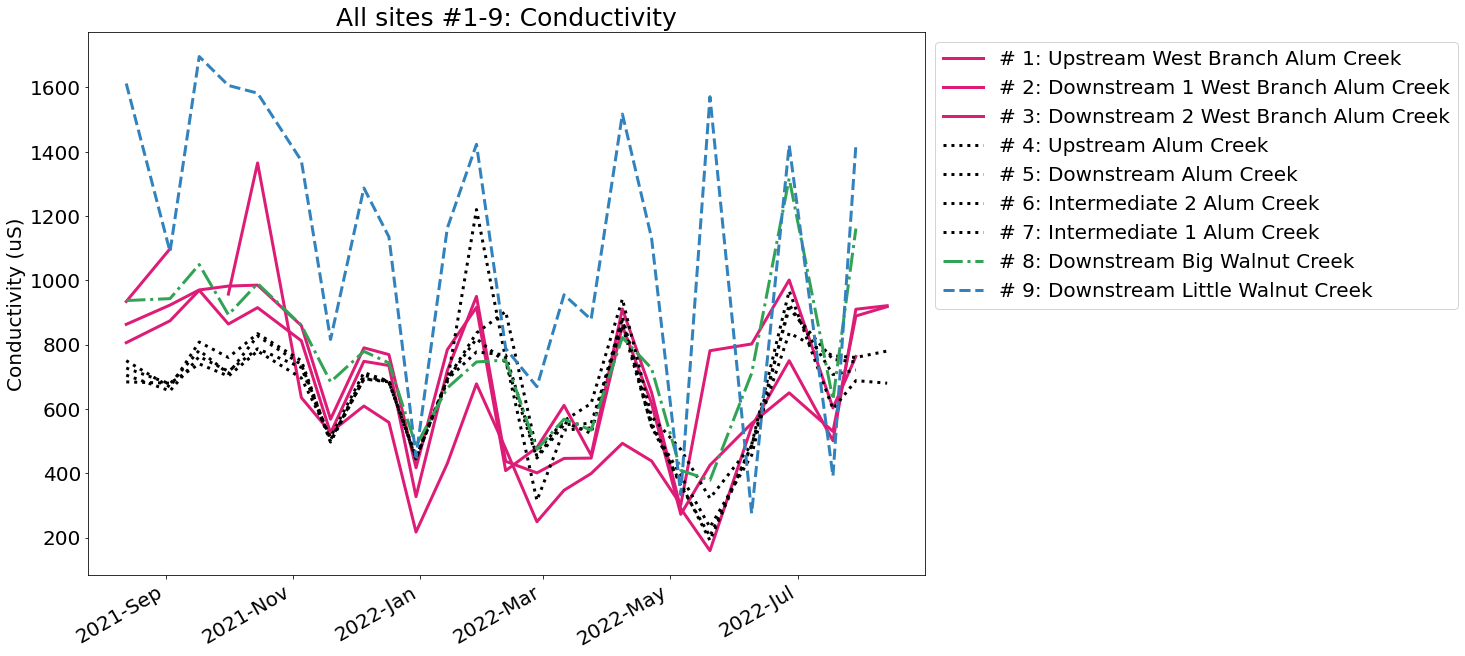

In [62]:
# All sites

fig, ax = plt.subplots(figsize=(15, 10))

# Varaibles
small = 15
med = 20
large = 25
linew = 3

# Plotting things 

ax.plot(biweek1.date, biweek1.cond, c = '#dd1c77', label='# 1: Upstream West Branch Alum Creek', linewidth=linew) # Site 1
ax.plot(biweek2.date, biweek2.cond, c = '#dd1c77', label='# 2: Downstream 1 West Branch Alum Creek', linewidth=linew) # Site 2
ax.plot(biweek3.date, biweek3.cond, c = '#dd1c77', label='# 3: Downstream 2 West Branch Alum Creek', linewidth=linew) # Site 3

ax.plot(biweek4.date, biweek4.cond, c = 'black', label='# 4: Upstream Alum Creek', linewidth=linew, linestyle = ':') # Site 4
ax.plot(biweek5.date, biweek5.cond, c = 'black', label='# 5: Downstream Alum Creek', linewidth=linew, linestyle = ':') # Site 5
ax.plot(biweek6.date, biweek6.cond, c = 'black', label='# 6: Intermediate 2 Alum Creek', linewidth=linew, linestyle = ':') # Site 6
ax.plot(biweek7.date, biweek7.cond, c = 'black', label='# 7: Intermediate 1 Alum Creek', linewidth=linew, linestyle = ':') # Site 7

ax.plot(biweek8.date, biweek8.cond, c = '#31a354', label='# 8: Downstream Big Walnut Creek', linewidth=linew, linestyle = '-.') # Site 8

ax.plot(biweek9.date, biweek9.cond, c = '#3182bd', label='# 9: Downstream Little Walnut Creek', linewidth=linew, linestyle = 'dashed') # Site 9

ax.tick_params(axis='y', labelsize= med)
ax.set_xticklabels(biweek1.date, rotation = 85, size= med)
ax.set_ylabel('Conductivity (uS)', size= med)
ax.set_title('All sites #1-9: Conductivity', size= large)

plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = med)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

In [63]:
## Split the dataframe into site-specific dataframes

biweek1 = biweek[biweek['site'] == 1] # West Branch Alum Creek, upstream
biweek2 = biweek[biweek['site'] == 2] # West Branch Alum Creek, downstream 1
biweek3 = biweek[biweek['site'] == 3] # West Branch Alum Creek, downstream 2
biweek4 = biweek[biweek['site'] == 4] # Headwaters Alum Creek, upstream
biweek5 = biweek[biweek['site'] == 5] # Headwaters Alum Creek, downstream
biweek6 = biweek[biweek['site'] == 6] # Headwaters Alum Creek, intermediate 2
biweek7 = biweek[biweek['site'] == 7] # Headwaters Alum Creek, intermediate 1
biweek8 = biweek[biweek['site'] == 8] # Headwaters Big Walnut Creek, downstream
biweek9 = biweek[biweek['site'] == 9] # Little Walnut Creek, downstream

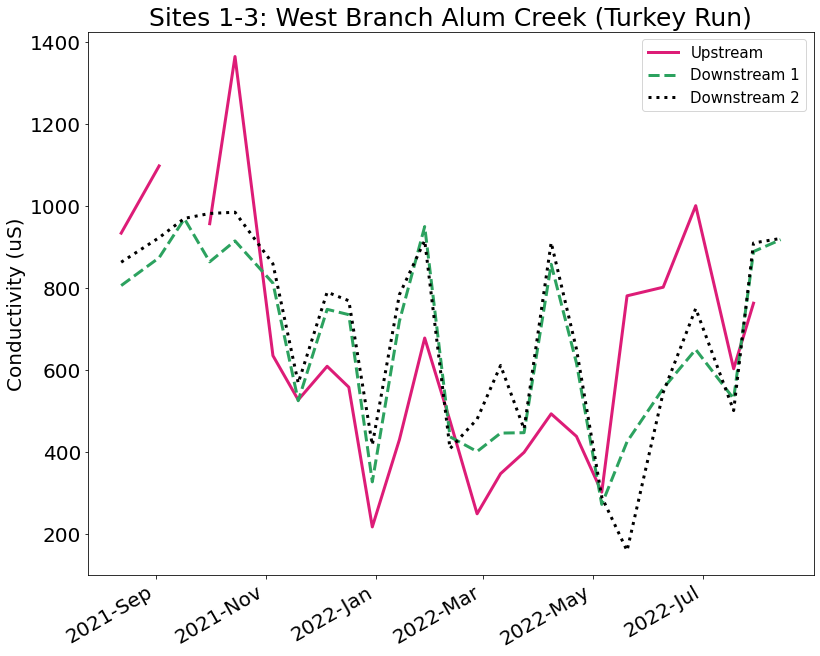

In [64]:
#West Branch Alum Creek sites (1-3) AKA Turkey Run

fig, ax = plt.subplots(figsize=(13, 10))

# Varaibles
small = 15
med = 20
large = 25
linew = 3

# Plotting things 

ax.plot(biweek1.date, biweek1.cond, c = '#dd1c77', label='Upstream', linewidth=linew) # Site 1
ax.plot(biweek2.date, biweek2.cond, c = '#2ca25f', label='Downstream 1', linewidth=linew, linestyle = '--') # Site 2
ax.plot(biweek3.date, biweek3.cond, c = 'black', label='Downstream 2', linewidth=linew, linestyle = ':') # Site 3

ax.tick_params(axis='y', labelsize= med)
ax.set_xticklabels(biweek1.date, rotation = 85, size= med)
ax.set_ylabel('Conductivity (uS)', size= med)
ax.set_title('Sites 1-3: West Branch Alum Creek (Turkey Run)', size= large)

ax.legend(loc='upper right', fontsize = small)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

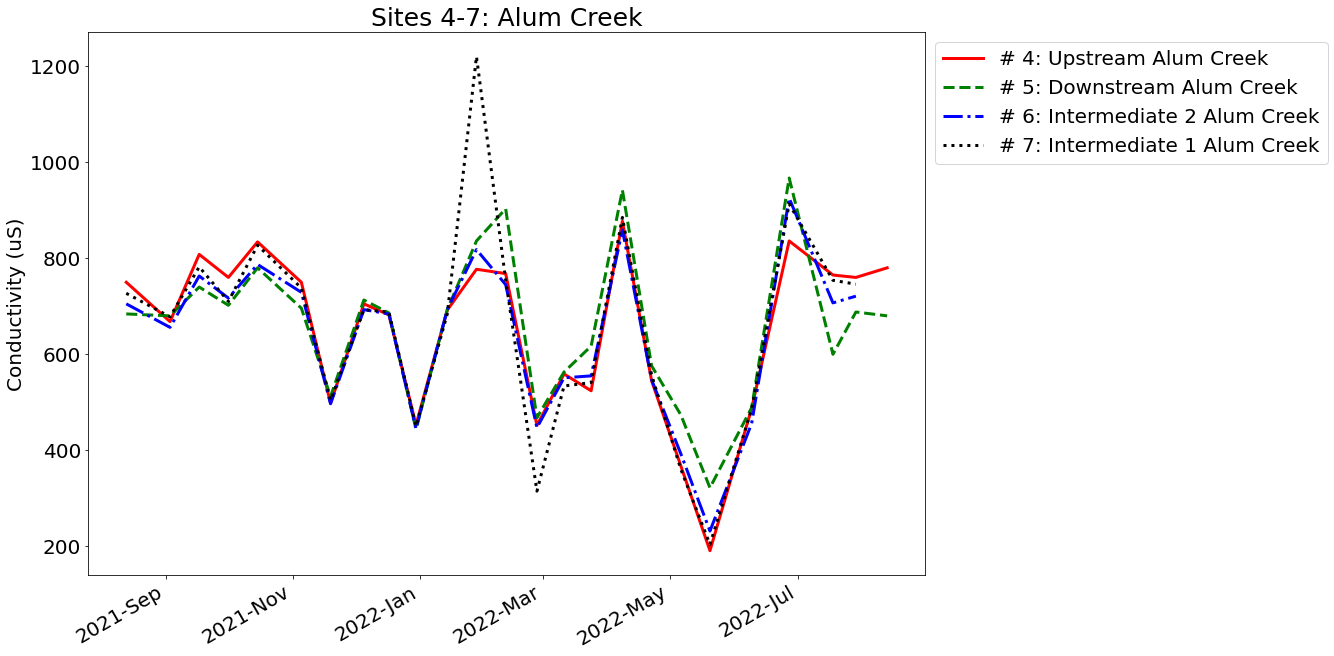

In [68]:
# Alum Creek drainage overlaid

fig, ax = plt.subplots(figsize=(15, 10))

# Varaibles
small = 15
med = 20
large = 25
linew = 3

# Plotting things 

ax.plot(biweek4.date, biweek4.cond, c = 'red', label='# 4: Upstream Alum Creek', linewidth=linew) # Site 4
ax.plot(biweek5.date, biweek5.cond, c = 'green', label='# 5: Downstream Alum Creek', linewidth=linew, linestyle = '--') # Site 5
ax.plot(biweek6.date, biweek6.cond, c = 'blue', label='# 6: Intermediate 2 Alum Creek', linewidth=linew, linestyle = '-.') # Site 6
ax.plot(biweek7.date, biweek7.cond, c = 'black', label='# 7: Intermediate 1 Alum Creek', linewidth=linew, linestyle = ':') # Site 7

ax.tick_params(axis='y', labelsize= med)
ax.set_xticklabels(biweek1.date, rotation = 85, size= med)
ax.set_ylabel('Conductivity (uS)', size= med)
ax.set_title('Sites 4-7: Alum Creek', size= large)

plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = med)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

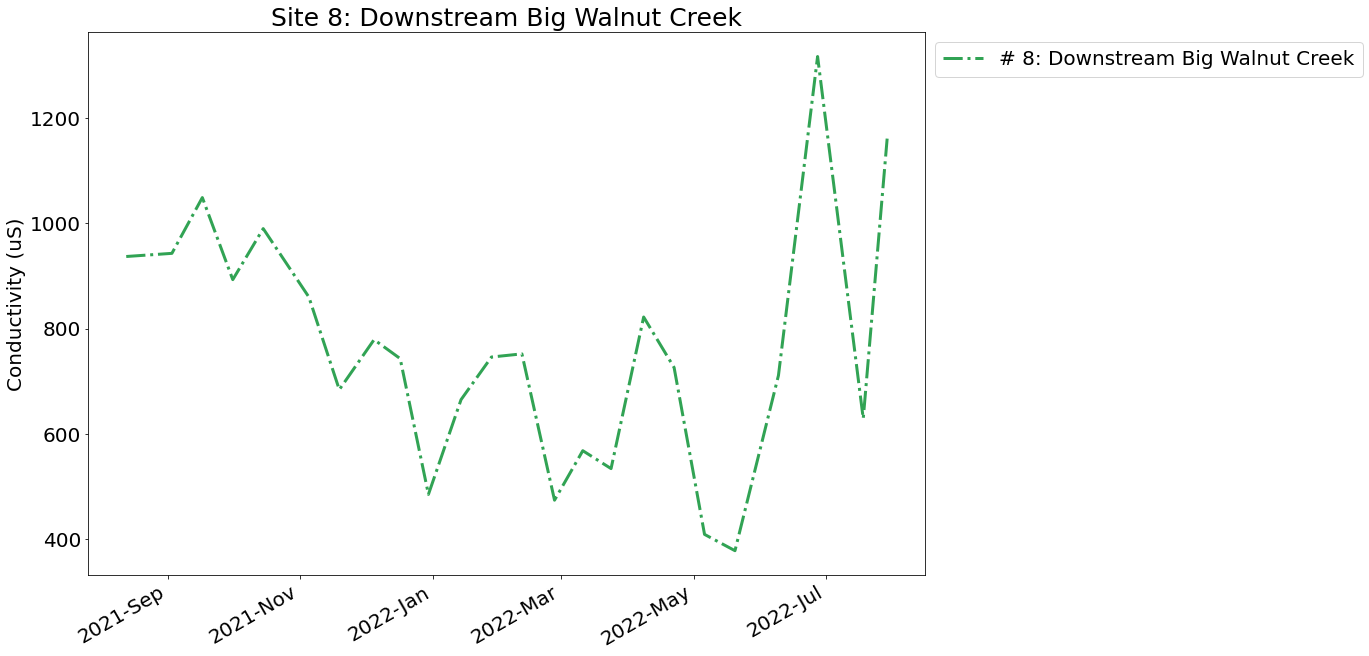

In [70]:
# Big Walnut Creek drainage 

fig, ax = plt.subplots(figsize=(15, 10))

# Varaibles
small = 15
med = 20
large = 25
linew = 3

# Plotting things 

ax.plot(biweek8.date, biweek8.cond, c = '#31a354', label='# 8: Downstream Big Walnut Creek', linewidth=linew, linestyle = '-.') # Site 8

ax.tick_params(axis='y', labelsize= med)
ax.set_xticklabels(biweek1.date, rotation = 85, size= med)
ax.set_ylabel('Conductivity (uS)', size= med)
ax.set_title('Site 8: Downstream Big Walnut Creek', size= large)

plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = med)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

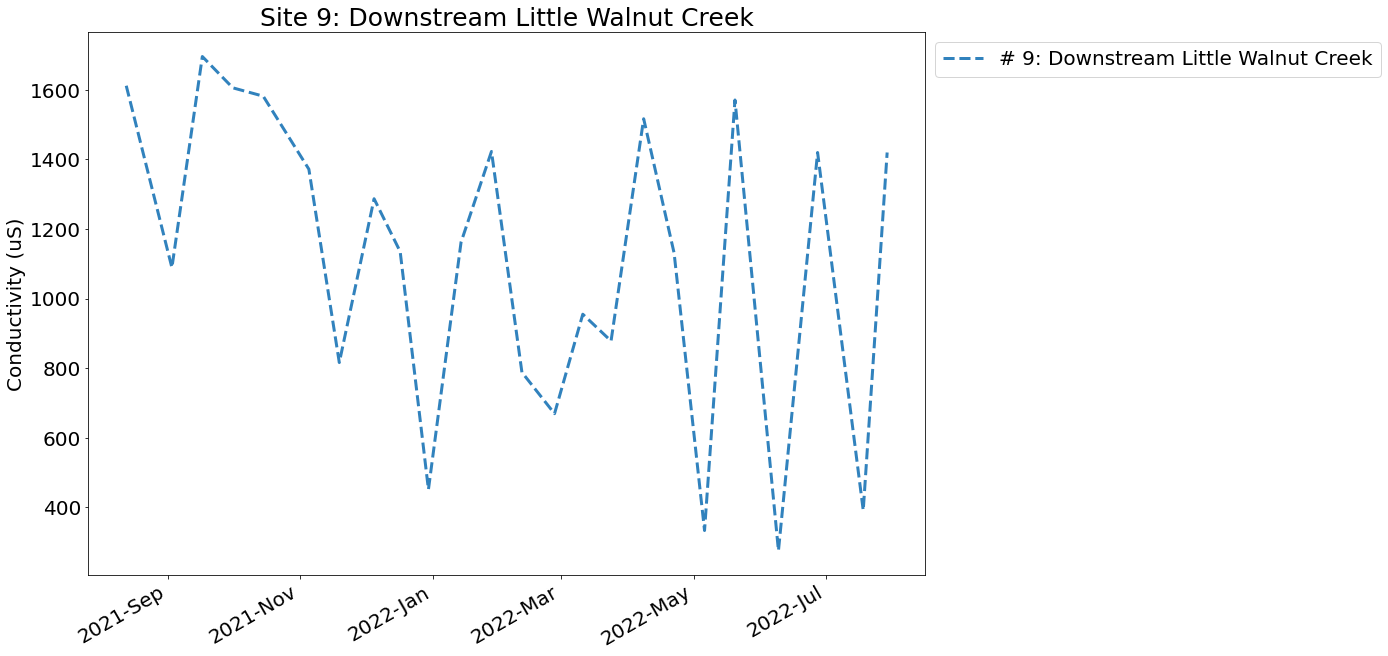

In [72]:
# Big Walnut Creek drainage 

fig, ax = plt.subplots(figsize=(15, 10))

# Varaibles
small = 15
med = 20
large = 25
linew = 3

# Plotting things 

ax.plot(biweek9.date, biweek9.cond, c = '#3182bd', label='# 9: Downstream Little Walnut Creek', linewidth=linew, linestyle = 'dashed') # Site 9

ax.tick_params(axis='y', labelsize= med)
ax.set_xticklabels(biweek1.date, rotation = 85, size= med)
ax.set_ylabel('Conductivity (uS)', size= med)
ax.set_title('Site 9: Downstream Little Walnut Creek', size= large)

plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = med)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()